In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('digit-recognizer/train.csv')


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0
_,m_train = X_train.shape

In [5]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    out = np.exp(Z) / sum(np.exp(Z))
    return out

def forw_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def deriv_ReLU(Z):
    return Z > 0
     
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_desc(X, Y, iter, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iter):
        Z1, A1, Z2, A2 = forw_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print('Iteration: ', i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
#training cell
W1, b1, W2, b2 = gradient_desc(X_train, Y_train, 100, 0.1)

Iteration:  0
[3 4 2 ... 4 4 4] [2 1 8 ... 5 5 3]
0.07392682926829268
Iteration:  10
[9 0 9 ... 4 9 4] [2 1 8 ... 5 5 3]
0.12470731707317073
Iteration:  20
[9 0 0 ... 4 9 4] [2 1 8 ... 5 5 3]
0.1675609756097561
Iteration:  30
[9 0 0 ... 4 9 4] [2 1 8 ... 5 5 3]
0.21665853658536585
Iteration:  40
[9 0 0 ... 4 9 0] [2 1 8 ... 5 5 3]
0.268609756097561
Iteration:  50
[9 0 8 ... 4 9 0] [2 1 8 ... 5 5 3]
0.31321951219512195
Iteration:  60
[2 1 8 ... 6 9 0] [2 1 8 ... 5 5 3]
0.3515121951219512
Iteration:  70
[2 1 8 ... 6 9 5] [2 1 8 ... 5 5 3]
0.3938780487804878
Iteration:  80
[2 1 8 ... 6 9 1] [2 1 8 ... 5 5 3]
0.4405609756097561
Iteration:  90
[2 1 8 ... 6 9 1] [2 1 8 ... 5 5 3]
0.48373170731707316


In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forw_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


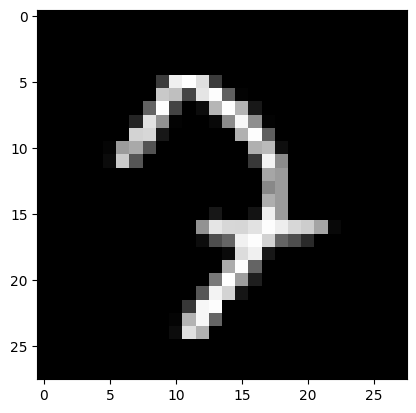

In [9]:
#quick testing cell
test_prediction(969, W1, b1, W2, b2)

In [10]:
#dev_set testing
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 9 2 6 9 3 3 2 3 3 8 0 1 9 2 9 0 8 8 1 9 9 0 8 2 7 8 4 0 9 7 0 4 4 1 1 0
 8 1 3 9 6 0 1 0 4 4 4 4 8 6 4 7 5 5 2 6 6 5 2 8 2 8 2 0 9 8 6 3 7 6 4 1 4
 3 6 7 8 9 9 4 3 1 7 8 9 3 8 4 9 8 9 7 3 3 0 4 4 8 6 9 1 9 3 8 6 0 3 9 1 6
 8 6 1 8 7 5 3 7 7 4 9 3 4 3 4 7 3 9 8 8 1 9 0 6 3 8 3 7 8 3 3 0 7 1 4 3 2
 0 7 1 6 0 3 9 7 1 2 8 6 4 6 7 8 0 4 3 8 3 0 4 9 1 5 6 1 9 4 2 2 0 1 3 1 4
 8 3 8 3 0 8 8 7 0 1 2 4 6 9 6 9 6 7 0 6 9 0 3 7 2 4 2 7 5 7 2 2 8 1 6 8 7
 4 4 4 9 1 3 8 8 9 3 2 2 0 9 0 8 4 9 7 9 2 8 1 0 8 3 7 7 1 3 7 7 7 9 6 7 9
 7 1 5 6 2 8 2 1 7 5 1 8 8 0 6 0 4 8 6 6 9 2 8 9 7 5 3 0 4 4 9 3 9 2 5 6 0
 0 2 3 6 7 2 3 6 8 6 9 7 0 4 8 1 0 0 8 0 6 8 4 0 9 7 7 5 6 4 8 3 8 2 9 2 2
 6 3 9 1 4 2 6 3 0 7 9 8 7 5 8 7 8 5 3 8 2 4 7 3 2 6 7 9 8 5 5 7 7 7 5 4 8
 1 0 3 7 9 5 2 4 7 0 6 0 2 8 3 5 8 9 9 6 0 5 7 7 1 2 7 4 4 3 0 0 6 0 0 4 9
 7 0 4 5 3 0 4 7 6 6 5 6 0 3 5 4 3 9 7 3 9 8 7 3 5 6 8 7 7 7 1 1 7 9 8 9 3
 3 7 0 8 4 9 9 6 1 2 8 1 9 3 2 9 9 5 8 7 3 8 9 7 3 6 9 3 0 7 9 3 3 6 0 7 0
 3 9 3 1 8 3 3 8 0 6 6 8 

np.float64(0.532)